In [ ]:
# Twitter US Airline Sentiment Analysis

In [1]:
!pip install pandas seaborn spacy textblob
!pip install matplotlib scikit-learn beautifulsoup4


In [2]:
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\H.H\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\H.H\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\H.H\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\H.H\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\H.H\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\H.H\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-d

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 4.7 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/12.8 MB 4.2 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 4.1 MB/s eta 0:00:03
     --------- ------------------------------ 3.1/12.8 MB 4.0 MB/s eta 0:00:03
     ------------- -------------------------- 4.2/12.8 MB 4.0 MB/s eta 0:00:03
     --------------- ------------------------ 5.0/12.8 MB 4.0 MB/s eta 0:00:02
     ------------------ --------------------- 5.8/12.8 MB 4.0 MB/s eta 0:00:02
     -------------------- ------------------- 6.6/12.8 MB 4.0 MB/s eta 0:00:02
     ----------------------- ---------------- 7.6/12.8 MB 4.0 MB/s eta 0:00:02
     -------------------------- ------------- 8.4/12.8 MB 4.0 MB/s eta 0:00:02
     ---------------------------- ----------- 9.2/12.8 MB 4.0 MB/s eta 0:00:01
     ------------------------------- -------- 10.2/12.8 MB 

In [3]:
import pandas as pd
df = pd.read_csv("Tweets.csv") #save file in working directory
df = df[['text','airline_sentiment']] # only keeps the required columns
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [5]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Loads english NLP model
nlp = spacy.load('en_core_web_sm')

# Using preprocessing function
def preprocess(text): #convert text into lowercase and process using spacy
    doc = nlp(text.lower())  # lowercase and run NLP pipeline
    tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and token.is_alpha]
    #removes stopwords and keeps only alphabetical words
    # use lemmatization to converts words to their base form
    return " ".join(tokens) #join token back into a single string

# Applying preprocessing
df['clean_text'] = df['text'].apply(preprocess)
df.head()

,text,airline_sentiment,clean_text
0,@VirginAmerica What @dhepburn said.,neutral,say
1,@VirginAmerica plus you've added commercials t...,positive,plus add commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,today mean need trip
3,@VirginAmerica it's really aggressive to blast...,negative,aggressive blast obnoxious entertainment guest...
4,@VirginAmerica and it's a really big bad thing...,negative,big bad thing


In [6]:
# word count in clean text
import pandas as pd
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split())) #spilts cleaned text #counts number of words
df['char_count'] = df['clean_text'].apply(len) #count total charcters in cleaned text
df['avg_word_len'] = df['char_count'] / df['word_count']
df['excl_count'] = df['text'].apply(lambda x: x.count('!')) #counts exclamation mark 
df['quest_count'] = df['text'].apply(lambda x: x.count('?')) #counts question mark 
df['has_hashtag'] = df['text'].apply(lambda x: 1 if '#' in x else 0) #if tweet contain hastag or else 0
df['has_mention'] = df['text'].apply(lambda x: 1 if '@' in x else 0) #if tweet contain mention @ or else 0

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer() 

X_tfidf = vectorizer.fit_transform(df['clean_text'])  
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_sums = tfidf_df.sum().sort_values(ascending=False)

df.head()

,text,airline_sentiment,clean_text,word_count,char_count,avg_word_len,excl_count,quest_count,has_hashtag,has_mention
0,@VirginAmerica What @dhepburn said.,neutral,say,1,3,3.000000,0,0,0,1
1,@VirginAmerica plus you've added commercials t...,positive,plus add commercial experience tacky,5,36,7.200000,0,0,0,1
2,@VirginAmerica I didn't today... Must mean I n...,neutral,today mean need trip,4,20,5.000000,1,0,0,1
3,@VirginAmerica it's really aggressive to blast...,negative,aggressive blast obnoxious entertainment guest...,9,71,7.888889,0,0,0,1
4,@VirginAmerica and it's a really big bad thing...,negative,big bad thing,3,13,4.333333,0,0,0,1


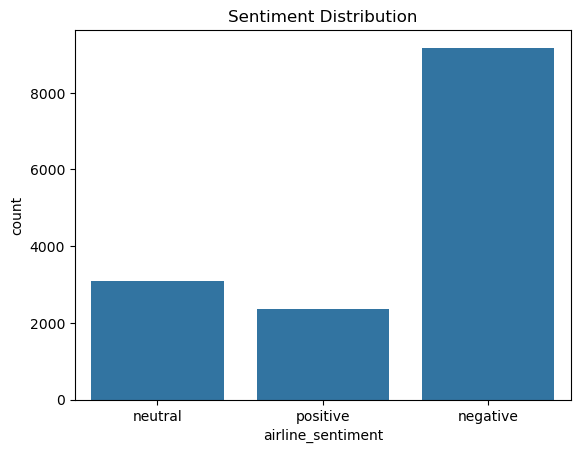

In [8]:
#sentiment polarity distribution 
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob #for calculating sentimentt polarity
df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity) #calculates snetimental polarity (-1 to +1)

# Plot sentiment counts
sns.countplot(x='airline_sentiment', data=df)
plt.title('Sentiment Distribution') # puts title on chart
plt.show()


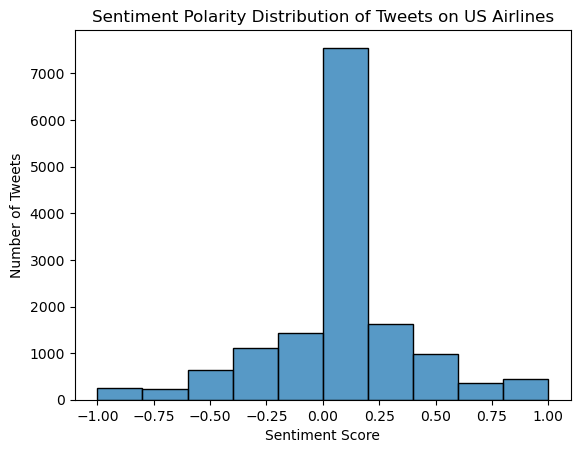

In [9]:
# Compute sentiment polarity
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plots sentiment distribution
sns.histplot(df['sentiment'], bins=10)
plt.title("Sentiment Polarity Distribution of Tweets on US Airlines")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Tweets")
plt.show()

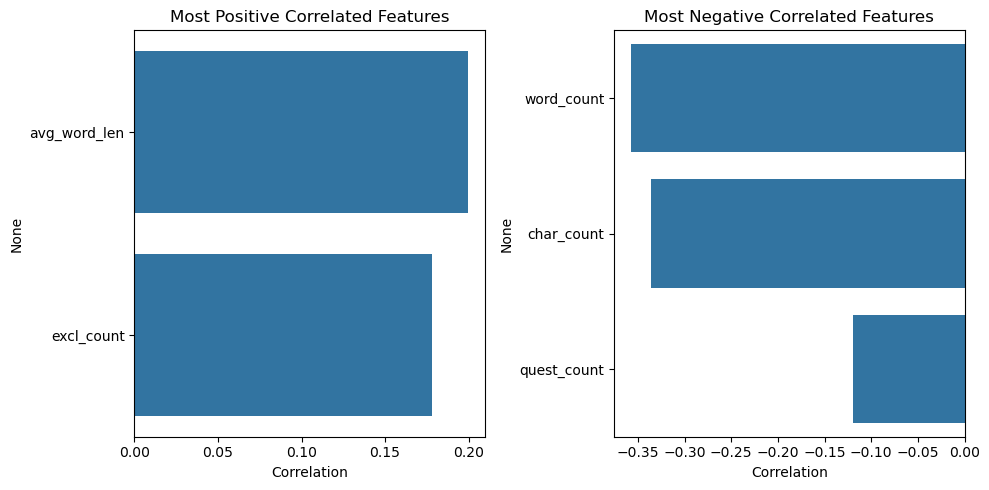

In [10]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again
df = pd.read_csv('Tweets.csv')

# Converting sentiment to numeric data
df['sentiment_label'] = df['airline_sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})

#extracting features from the dataset 
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
df['avg_word_len'] = df['char_count'] / df['word_count']
df['excl_count'] = df['text'].apply(lambda x: str(x).count('!'))
df['quest_count'] = df['text'].apply(lambda x: str(x).count('?'))

# List of feature columns 
features = ['word_count', 'char_count', 'avg_word_len', 'excl_count', 'quest_count']

# it calculates correlation with sentiment
correlations = df[features + ['sentiment_label']].corr()['sentiment_label'].drop('sentiment_label') # calculates each feature with its correlated sentiment 

top_positive_features = correlations[correlations > 0].sort_values(ascending=False).head(20) # selects top  20   postive correlated features 
top_negative_features = correlations[correlations < 0].sort_values().head(20)                #  ''     ''   ''  negative ' '    '' 

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=top_positive_features.values, y=top_positive_features.index, ax=axes[0])
axes[0].set_title("Most Positive Correlated Features")
axes[0].set_xlabel("Correlation")

sns.barplot(x=top_negative_features.values, y=top_negative_features.index, ax=axes[1])
axes[1].set_title('Most Negative Correlated Features')
axes[1].set_xlabel('Correlation')

plt.tight_layout()
plt.show() #show the end result 
